## Quien sobrevivio el accidente del Titanic?

#### Actividad evaluativa 5 
Profesor Alfonso Cervantes Barragán - 14-10-2020

### Descripción del contexto.

En esta actividad el estudiante debera realizar un análisis exploratorio de Datos (EDA) del dataset *titanic.csv*, que contiene información sobre los pasajeros del accidente del Barco "Titanic".

La descripción de las columnas del dataset es la siguiente:

|Columna |	Descripción |  
|--------|--------------|
|Survived	| Sobrevivio? 0=No, 1=Si |   
|Pclass | Ticket class: 1=1st, 2=2nd, 3=3rd|
|sex    | genero del pasajero |
|Age    | Edad del pasajero. En años |
|SibSp  | número de hermanos en el Titatic |
|parch  | Número de padres/hijos en el Titatic |
|ticket | número del tiquete  |
|Fare   | Tarija del pasajero (dólares)  |
|cabin  | número de cabina |
|Embarked | En que puerdo enbarco: C=Cherbourg, Q=Queenstown, S=Southampton |



#### Entregable

El estudiante debera entregar un documento con extensión *ipynb* mediante el taller "Quinta Evaluación " que se encuentra en el curso virtual Informatica III en el plataforma Sergio Virtual


#### Plazo

El plazo de entrega sera hasta el domingo, 18 de octubre a las 11:30 p.m. En el aula del curso en la plataforma Sergio Virtual estará disponible un taller en el cual deberan subir el archivo .ipynb (Jupyter notebook) con todo el código requerido. 

No esta permitido resolver los ejercicios a mano ni ingresar la respuesta sin que haya un código que lo respalde.

#### Donde puedo trabajar?

Este ejercicio se puede realizar en el entorno virtual creado con base en el repositorio github.com/alfonsocerv/datascience en la carpeta /ejericicio/caso11.

#### Criterios de evaluación

1. Todo el código requerido debe estar presente. Cada ejercicio debe tener su respectiva respuesta.
2. No pueden haber errores que se generen al ejecutar el código.
3. El código debe cumplir con las especificaciones de cada ejercicio.

### Ejercicio 1

Importa las librerias pandas, numpy y matplotlib

#### Respuesta

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 2

Cargar el dataset *titanic.csv* y almacenarlo en la variable *datat*. Muestre los primeros 5 registros.

#### Respuesta

In [24]:
datat = pd.read_csv("titanic.csv")

In [25]:
datat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Ejercicio 3

De acuerdo con la descripción de los valores que ocupan cada columna presentada previamente, determine cuales de las variables (=las columnas) son categóricas?. 

Ingrese su respuesta como celda de texto aquí en el documento a continuación

#### Respuesta

In [4]:
datat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Las columnas categoricas son: passergerId, survived, Pclass, Sex, Embarket

### Ejercicio 4

Determine el porcentaje de mujeres y hombres que estuvieron en el Titanic

#### Respuesta

In [5]:
datat["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
mujeres = datat["Sex"].value_counts()[1]
total = datat.shape[0]
print ("Las mujeres que estuvieron en el titanic corresponden a un porcentaje de", (mujeres/total)*100)

Las mujeres que estuvieron en el titanic corresponden a un porcentaje de 35.24130190796858


In [27]:
hombres = datat["Sex"].value_counts()[0]
total = datat.shape[0]
print ("Los hombres que estuvieron en el titanic corresponden a un porcentaje de", (hombres/total)*100)

Los hombres que estuvieron en el titanic corresponden a un porcentaje de 64.75869809203144


### Ejercicio 5

Determine la edad promedio de los hombres y mujeres

#### Respuesta

In [8]:
datat["Age"].mean()

29.69911764705882

### Ejercicio 6

Agrupe los registros según el genero y muestre todas las estadísticas básicas relacionadas entre hombres y mujeres

#### Respuesta

In [9]:
datat["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

### Ejercicio 7

Escriba un código que determine el rango de edad de los hombres.

#### Respuesta

In [28]:
datat[["Sex","Age"]].groupby(["Sex"]).min()

,Age
Sex,
female,0.75
male,0.42


In [29]:
datat[["Sex","Age"]].groupby(["Sex"]).max()

,Age
Sex,
female,63.0
male,80.0


observando que la edad minima de los hombres que ingresaron al barco fue de 0.42 y la maxima de 80.0, 
podemos decir que el rango de edad es 79.58

### Ejercicio 8

Determine si en primera clase se embarcaron más mujeres o hombres. Para resolver esto, agrupe los datos según la clase del tiquete y el género. Una vez lo haya hecho aplique el método count()

#### Respuesta

In [12]:
datat["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
datat[["Pclass","Sex", "PassengerId"]].groupby(["Pclass", "Sex"]).count()

PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

en primer clase se embarcaron 122 hombres y 94 mujeres

### Ejercicio 9

Determine que porcentaje de pasajeros sobrevivio al accidente del Titanic

#### Respuesta

In [32]:
sobrevivio = datat["Survived"].value_counts()[1]
total = datat.shape[0]

In [31]:
print ("El porcentaje de personas que sobrevivieron al titanic fue", (sobrevivio/total)*100)

El porcentaje de personas que sobrevivieron al titanic fue 38.38383838383838


El 61.6% de los pasajeros no sobrevivio al accidente del Titanic.

### Ejercicio 10

Determine cuántos de los sobrevivientes eran mujeres y cuántos hombres?

#### Respuesta

In [15]:
datat[["Survived","Sex", "PassengerId"]].groupby(["Survived", "Sex"]).count()

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109

de los que sobrevivieron al titanic 233 eran mujeres y 109 eran hombres

### Ejercicio 11

Determine cuántas de las mujeres que sobrevivieron al Titanic tenian más de dos hermanos abordo?

#### Respuesta

In [16]:
datat[["Survived","Sex","SibSp", "PassengerId"]].groupby(["SibSp", "Sex", "Survived"]).count()

PassengerId
SibSp Sex    Survived             
0     female 0                  37
             1                 137
      male   0                 361
             1                  73
1     female 0                  26
             1                  80
      male   0                  71
             1                  32
2     female 0                   3
             1                  10
      male   0                  12
             1                   3
3     female 0                   7
             1                   4
      male   0                   5
4     female 0                   4
             1                   2
      male   0                  11
             1                   1
5     female 0                   1
      male   0                   4
8     female 0                   3
      male   0                   4

al titanic sobrevivieron 6 mujeres con mas de dos hermanos

### Ejercicio 12

Determine el número de mujeres que se embarcaron en Queenstown (Q). Utilice el método groupby. Agrupe según las variables *Embarked* y *Sex*

#### Respuesta

In [19]:
datat[["Embarked", "Sex","PassengerId"]].groupby([ "Embarked", "Sex"]).count()

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

se embarcaron 36 mujeres


### Ejercicio 13

Cuál fue la tarifa máxima que se pago en primera clase?.

#### Respuesta

In [20]:
 datat[["Fare", "Pclass"]].groupby(["Pclass"]).max()

,Fare
Pclass,
1,512.3292
2,73.5000
3,69.5500


la tarifa maxima pagada en primera clase fue de 512.3292

### Ejercicio 14

Cuál fue la tarifa máxima que pago en segunda clase una pasajera femenina?.

#### Respuesta

In [21]:
 datat[["Fare", "Pclass", "Sex"]].groupby([ "Pclass", "Sex"]).max()

Fare
Pclass Sex             
1      female  512.3292
       male    512.3292
2      female   65.0000
       male     73.5000
3      female   69.5500
       male     69.5500

la maxima tarifa que pago una pasajera en segunda clase fue de 65.0000

### Ejercicio 15

Cuál fue la tarifa máxima que pago en segunda clase una pasajera femenina que se embarco en Cherbourg (C)?.

#### Respuesta

In [22]:
 datat[["Fare", "Pclass", "Sex", "Embarked"]].groupby([ "Pclass", "Sex", "Embarked"]).max()

Fare
Pclass Sex    Embarked          
1      female C         512.3292
              Q          90.0000
              S         263.0000
       male   C         512.3292
              Q          90.0000
              S         263.0000
2      female C          41.5792
              Q          12.3500
              S          65.0000
       male   C          41.5792
              Q          12.3500
              S          73.5000
3      female C          22.3583
              Q          29.1250
              S          69.5500
       male   C          21.6792
              Q          29.1250
              S          69.5500

la tarifa maxima que pago una pasajera en segunda clase en cherbourg fue de 41.5792

### Ejercicio 16

Escriba un código de presente un histograma de las edades de los pasajeros, usando 50 bins con 15 pulgadas de largo y 8 de altura.

#### Respuesta

<AxesSubplot:>

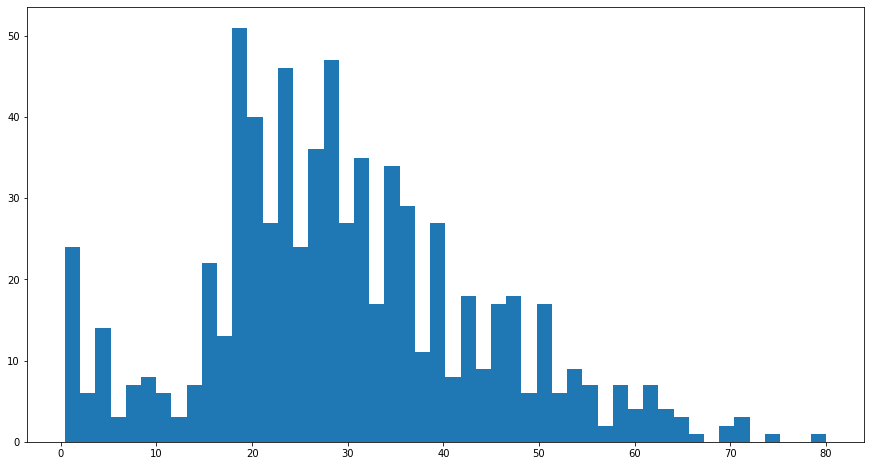

In [23]:
datat["Age"].hist(bins=50, grid=False, figsize=(15,8))
